<a href="https://colab.research.google.com/github/evarevolt/Practical-work/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_1_%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.model_selection import train_test_split

URL = 'https://storage.yandexcloud.net/academy.ai/practica/fake_news.csv'
data = pd.read_csv(URL)

data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
print(data.shape)

(6335, 4)


In [ ]:
X = data['text'].astype(str)
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.2)

In [ ]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, classification_report

classifier = PassiveAggressiveClassifier(max_iter=1000, random_state=42)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

        FAKE       0.94      0.93      0.94       628
        REAL       0.94      0.94      0.94       639

    accuracy                           0.94      1267
   macro avg       0.94      0.94      0.94      1267
weighted avg       0.94      0.94      0.94      1267



In [ ]:
X_gg = vectorizer.transform(['''One of the world's largest street music festivals has taken place in London.

Around sixty bands in colourful costumes took part in the Notting Hill Carnival. Thirty-eight sound systems entertained the crowds.

Revellers at the annual event donned raincoats and held umbrellas as west London was hit by downpours.

More than a million people are believed to have attended the event across its two days.'''])

y_gg = classifier.predict(X_gg)

print(y_gg)

['FAKE']


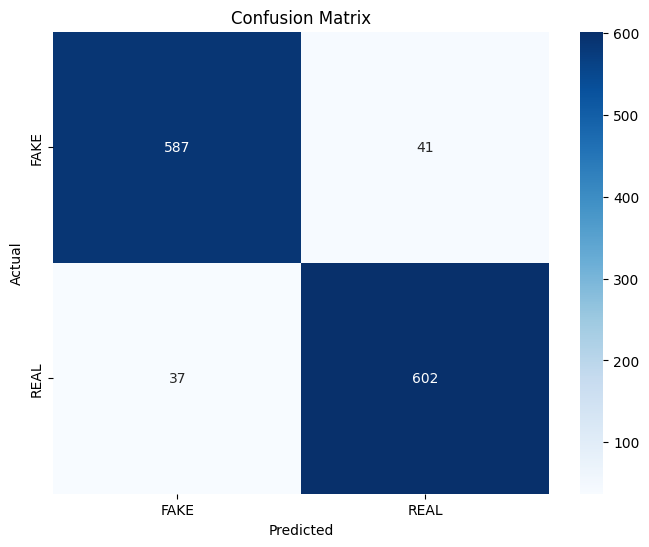

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import  confusion_matrix
import numpy as np

classes = np.unique(y_train)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

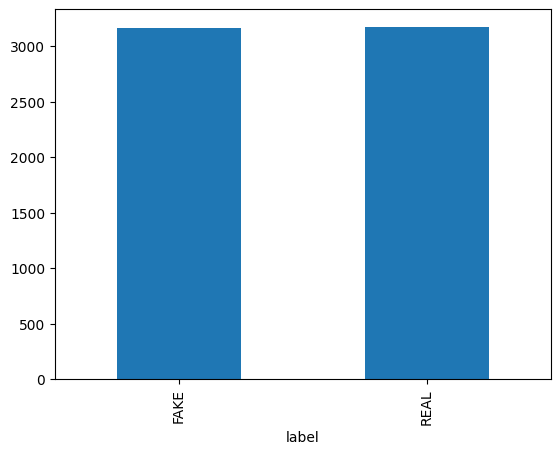

In [ ]:
data.groupby('label').label.count().plot.bar(ylim=0)
plt.show()

In [ ]:
data.groupby('label').label.count()

label
FAKE    3164
REAL    3171
Name: label, dtype: int64

**ЗАДАНИЕ №2**